In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


# **TRAINING DATA PRE-PROCESSING**

In [ ]:
full_data = pd.read_csv("/content/project 1.csv")

# Data **Shape**

In [ ]:
full_data.shape

(244, 7)

In [ ]:
full_data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### missing **values**

<Axes: >

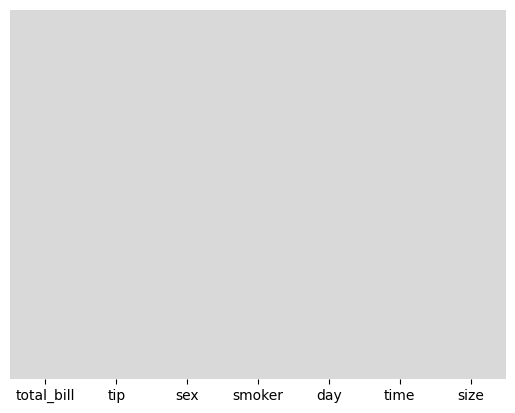

In [ ]:
sns.heatmap(full_data.isnull(),yticklabels=False,cmap='tab20c_r',cbar=False)


### **Distribution of Data**

<Axes: xlabel='day', ylabel='Count'>

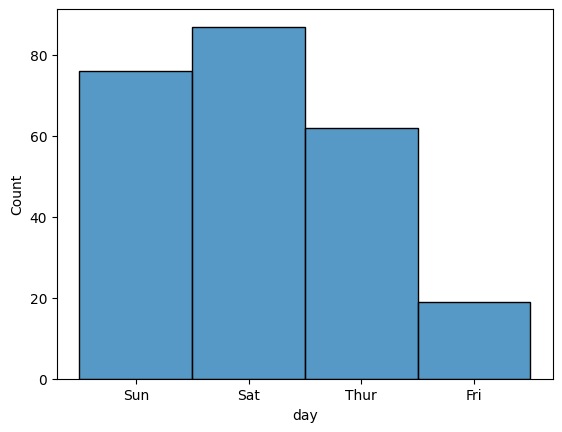

In [ ]:
sns.histplot(full_data['day'],kde=False)

<Axes: xlabel='sex', ylabel='Count'>

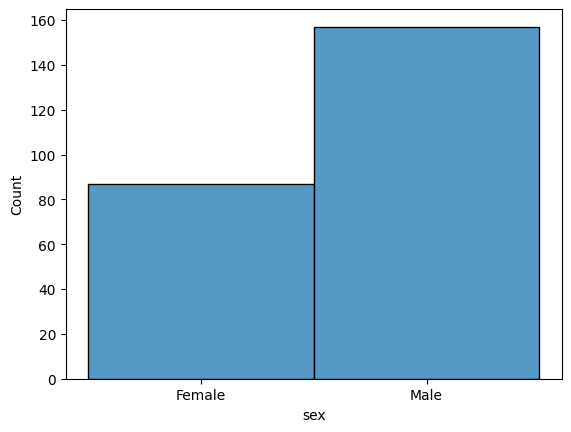

In [ ]:
sns.histplot(full_data['sex'])

<Axes: xlabel='smoker', ylabel='Count'>

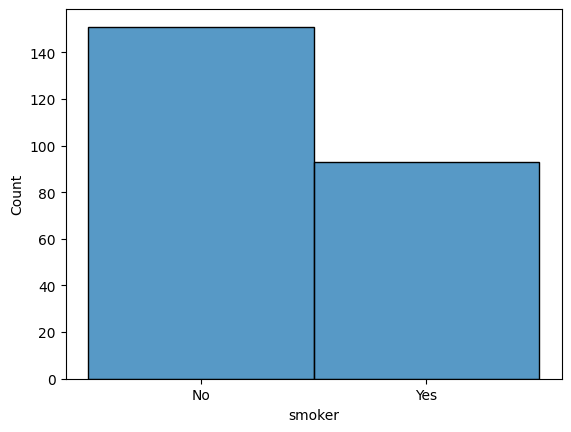

In [ ]:
sns.histplot(full_data['smoker'])

<Axes: xlabel='time', ylabel='Count'>

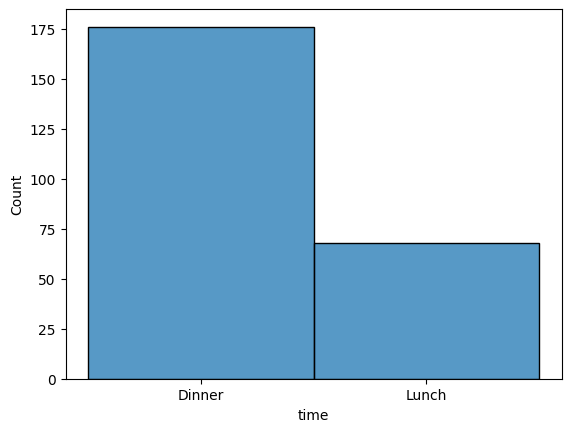

In [ ]:
sns.histplot(full_data['time'])

In [ ]:
full_data.dropna(inplace=True)

In [ ]:
full_data.shape

(244, 7)

<Axes: xlabel='total_bill'>

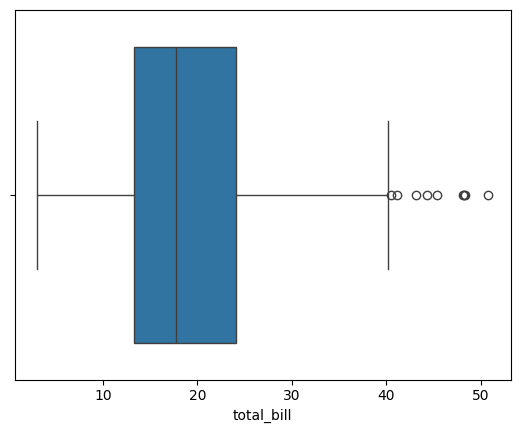

In [ ]:
sns.boxplot(x='total_bill',data=full_data)

<Axes: xlabel='tip'>

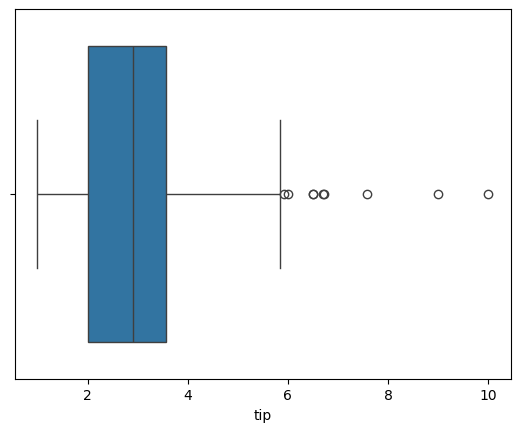

In [ ]:
sns.boxplot(x='tip', data=full_data)

<Axes: xlabel='size'>

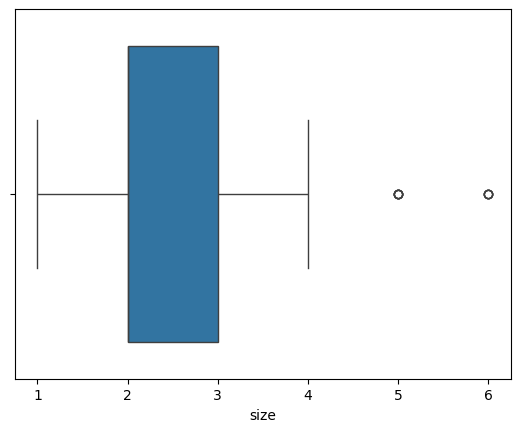

In [ ]:
sns.boxplot(x='size', data=full_data)


In [ ]:
full_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill', ylabel='tip'>

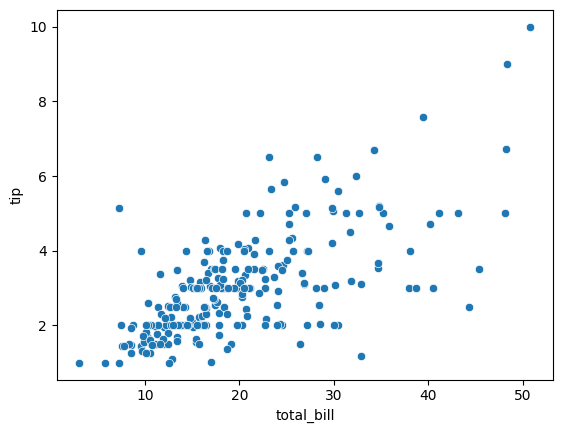

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=full_data)

<Axes: xlabel='total_bill', ylabel='size'>

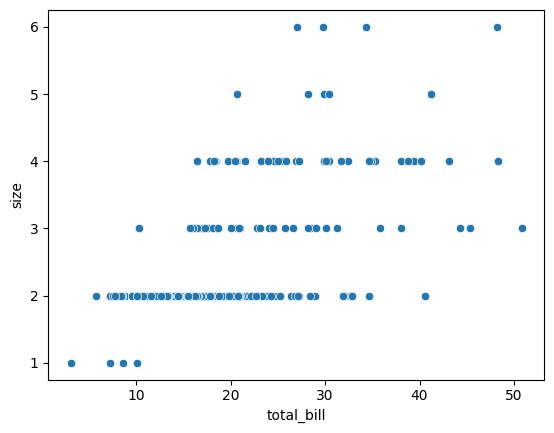

In [ ]:
sns.scatterplot(x='total_bill',y='size',data=full_data)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### **GETTING MODEL READY**

## **Convert categorical variables into 'dummy' or indicator variables**

In [ ]:
sex=pd.get_dummies(full_data['sex'],drop_first= True)

In [ ]:
smoker=pd.get_dummies(full_data['smoker'],drop_first=True)

In [ ]:
day=pd.get_dummies(full_data['day'],drop_first=True)

In [ ]:
time=pd.get_dummies(full_data['time'],drop_first=True)

In [ ]:
full_data=pd.concat([full_data,sex,smoker,day,time],axis=1)

In [ ]:
full_data.head(5)

,total_bill,tip,sex,smoker,day,time,size,Male,Yes,Sat,Sun,Thur,Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,False,False,False,True,False,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True,False,False,True,False,False
2,21.01,3.50,Male,No,Sun,Dinner,3,True,False,False,True,False,False
3,23.68,3.31,Male,No,Sun,Dinner,2,True,False,False,True,False,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False,False,False,True,False,False


In [ ]:
full_data.drop(['sex','smoker','day','time'],axis = 1, inplace = True)

In [ ]:
full_data.head(5)

,total_bill,tip,size,Male,Yes,Sat,Sun,Thur,Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


### **Target Variable Splitting**

In [ ]:
x=full_data.drop('total_bill',axis = 1)

In [ ]:
y = full_data['total_bill']

In [ ]:
x.shape

(244, 8)

In [ ]:
y.shape

(244,)

## **Data Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
pre_process= StandardScaler().fit(x)

In [ ]:
x_transform = pre_process.transform(x)

In [ ]:
# @title
# x Represents the Features
x_transform.shape
x_transform

array([[-1.43994695e+00, -6.00192629e-01, -1.34335316e+00, ...,
         1.48678388e+00, -5.83660296e-01, -6.21581561e-01],
       [-9.69205340e-01,  4.53382921e-01,  7.44405889e-01, ...,
         1.48678388e+00, -5.83660296e-01, -6.21581561e-01],
       [ 3.63355539e-01,  4.53382921e-01,  7.44405889e-01, ...,
         1.48678388e+00, -5.83660296e-01, -6.21581561e-01],
       ...,
       [-7.22971264e-01, -6.00192629e-01,  7.44405889e-01, ...,
        -6.72592709e-01, -5.83660296e-01, -6.21581561e-01],
       [-9.04025732e-01, -6.00192629e-01,  7.44405889e-01, ...,
        -6.72592709e-01, -5.83660296e-01, -6.21581561e-01],
       [ 1.24660453e-03, -6.00192629e-01, -1.34335316e+00, ...,
        -6.72592709e-01,  1.71332538e+00, -6.21581561e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= .20, random_state=101 )

In [ ]:
x_train.shape
# x_train

(195, 8)

In [ ]:
x_test.shape
# x_test

(49, 8)

In [ ]:
y_train.shape
# y_train

(195,)

In [ ]:
y_test.shape
# y_test

(49,)

# **LINEAR REGRESSION**

## **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg= LinearRegression()

In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression()

## **Model Testing**

In [ ]:
y_pred= lin_reg.predict(x_test)
print(y_pred.shape)
y_pred

(49,)


array([13.96051832, 18.49043896, 23.19258107, 24.65201698, 23.12634831,
       12.44727499, 43.39788597, 15.56939543, 27.17117616, 10.8046541 ,
       20.82604524, 15.77346751,  9.96532577, 15.50224916, 17.16393015,
       17.20014686, 23.31026585, 16.96249135, 11.24110483, 20.27017966,
       14.51429621, 18.96389874, 14.0752019 , 15.62466193, 20.322257  ,
       11.70866606, 19.03006142, 22.32121205, 28.79603569, 16.30646552,
       24.46663006, 19.69679282, 12.51687359, 35.37254173, 28.84983281,
       11.4089705 , 21.57534944, 15.63917497, 22.43337322, 21.24208074,
       19.29109646, 23.51016581, 27.13361185, 31.4441308 , 37.37359086,
       13.45637246, 16.22444157, 28.02384333, 15.50224916])

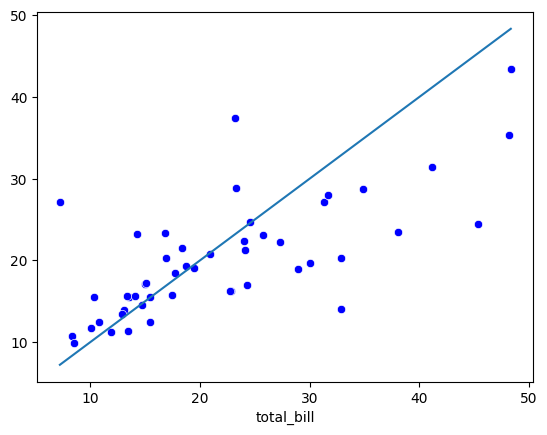

In [ ]:
sns.scatterplot(x=y_test,y=y_pred,color='blue')
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)])

In [ ]:
results= np.column_stack((y_test,y_pred))
print('actual values | Predicted values')
print('---------------------------------------')
for actual ,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

actual values | Predicted values
---------------------------------------
         13.13 |         13.96
         17.78 |         18.49
         14.31 |         23.19
         24.59 |         24.65
         25.71 |         23.13
         10.77 |         12.45
         48.33 |         43.40
         15.48 |         15.57
          7.25 |         27.17
          8.35 |         10.80
         20.92 |         20.83
         17.46 |         15.77
          8.51 |          9.97
         13.51 |         15.50
         15.01 |         17.16
         15.06 |         17.20
         16.82 |         23.31
         24.27 |         16.96
         11.87 |         11.24
         16.93 |         20.27
         14.73 |         14.51
         28.97 |         18.96
         32.83 |         14.08
         13.39 |         15.62
         32.90 |         20.32
         10.07 |         11.71
         19.49 |         19.03
         27.28 |         22.32
         34.83 |         28.80
         22.82 |         16.

In [ ]:
residual = actual - y_pred.reshape(-1)
residual

array([ -3.62051832,  -8.15043896, -12.85258107, -14.31201698,
       -12.78634831,  -2.10727499, -33.05788597,  -5.22939543,
       -16.83117616,  -0.4646541 , -10.48604524,  -5.43346751,
         0.37467423,  -5.16224916,  -6.82393015,  -6.86014686,
       -12.97026585,  -6.62249135,  -0.90110483,  -9.93017966,
        -4.17429621,  -8.62389874,  -3.7352019 ,  -5.28466193,
        -9.982257  ,  -1.36866606,  -8.69006142, -11.98121205,
       -18.45603569,  -5.96646552, -14.12663006,  -9.35679282,
        -2.17687359, -25.03254173, -18.50983281,  -1.0689705 ,
       -11.23534944,  -5.29917497, -12.09337322, -10.90208074,
        -8.95109646, -13.17016581, -16.79361185, -21.1041308 ,
       -27.03359086,  -3.11637246,  -5.88444157, -17.68384333,
        -5.16224916])

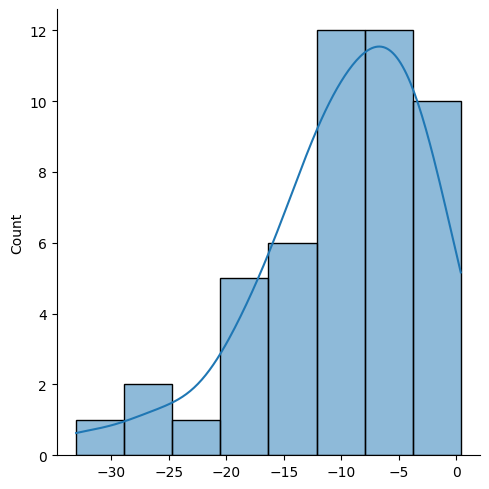

In [ ]:
sns.displot(residual,kde=True)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('mean_squared_error :' , mse)
print('root_mean_squared_error : ' , rmse)

mean_squared_error : 56.05297334117387
root_mean_squared_error :  7.486853367147901
